In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/var/folders/js/1jn3wrb54td_f9y0bzldhhbw0000gn/T/ipykernel_1621/82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Document Set Up Notes

* Bryn edit: Make sure all of the project requirements and label the experiments

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/torrescschool/foodborne_pathogens/main/Tycho_various_complete.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   ConditionSNOMED  23686 non-null  int64 
 2   PathogenName     23686 non-null  object
 3   PathogenTaxonID  23686 non-null  int64 
 4   Fatalities       23686 non-null  int64 
 5   CountryISO       23686 non-null  object
 6   Admin1Name       23686 non-null  object
 7   Admin1ISO        23686 non-null  object
 8   Admin2Name       16914 non-null  object
 9   CityName         16914 non-null  object
 10  PeriodStartDate  23686 non-null  object
 11  PeriodEndDate    23686 non-null  object
 12  CountValue       23686 non-null  int64 
 13  DOI              23686 non-null  object
dtypes: int64(4), object(10)
memory usage: 2.5+ MB


## Removing columns to df

In [6]:

df.drop(labels = ['PeriodEndDate','PathogenName', 'Admin2Name',
                  'CityName','Fatalities','DOI','ConditionSNOMED','PathogenTaxonID',
                  'CountryISO','Admin1Name','Admin1ISO'], axis = 1, inplace = True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   PeriodStartDate  23686 non-null  object
 2   CountValue       23686 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 555.3+ KB


# Resampling

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   PeriodStartDate  23686 non-null  object
 2   CountValue       23686 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 555.3+ KB


In [9]:
df.drop(labels = 'ConditionName', axis = 1, inplace = True)

In [10]:
df['PeriodStartDate'] = pd.to_datetime(df['PeriodStartDate'])

In [11]:
df.set_index('PeriodStartDate', inplace = True)

In [12]:
df.sort_index(inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23686 entries, 1888-06-24 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  23686 non-null  int64
dtypes: int64(1)
memory usage: 370.1 KB


In [14]:
df.head(20)

,CountValue
PeriodStartDate,
1888-06-24,12
1888-07-01,9
1888-07-08,1
1888-07-08,13
1888-07-15,1
1888-07-15,17
1888-07-22,23
1888-07-22,2
1888-07-24,1


In [15]:
# Resample the data to a weekly frequency on the specific starting day of the week
df = df.resample('W-SUN').sum()  # Assuming Sunday as the end of the week
df.reset_index(inplace=True)
df.set_index('PeriodStartDate', inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6758 entries, 1888-06-24 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  6758 non-null   int64
dtypes: int64(1)
memory usage: 105.6 KB


In [17]:
df.head(20)

,CountValue
PeriodStartDate,
1888-06-24,12
1888-07-01,9
1888-07-08,14
1888-07-15,18
1888-07-22,25
1888-07-29,52
1888-08-05,42
1888-08-12,38
1888-08-19,48


# Explore date range

### Range of dates

In [18]:
df_dates = df.info()
print(df_dates)
print()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6758 entries, 1888-06-24 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  6758 non-null   int64
dtypes: int64(1)
memory usage: 105.6 KB
None



## Viewing Histogram to see the distribution before modeling

(array([3.917e+03, 1.311e+03, 7.150e+02, 3.270e+02, 1.780e+02, 1.240e+02,
        4.700e+01, 2.200e+01, 1.400e+01, 1.600e+01, 1.800e+01, 1.100e+01,
        7.000e+00, 1.000e+01, 3.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. , 162.8, 177.6, 192.4, 207.2, 222. , 236.8, 251.6,
        266.4, 281.2, 296. , 310.8, 325.6, 340.4, 355.2, 370. , 384.8,
        399.6, 414.4, 429.2, 444. , 458.8, 473.6, 488.4, 503.2, 518. ,
        532.8, 547.6, 562.4, 577.2, 592. ]),
 <BarContainer object of 40 artists>)

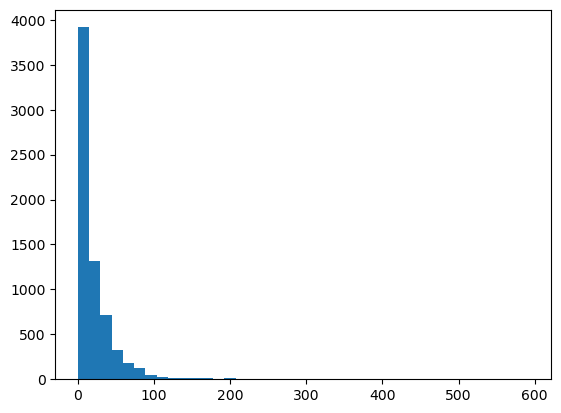

In [19]:
plt.hist(data = df, x = 'CountValue', bins = 40 )

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6758 entries, 1888-06-24 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  6758 non-null   int64
dtypes: int64(1)
memory usage: 105.6 KB


# Modeling

## Splitting the Data

In [21]:
def split_time_series_data(data, start_year, end_year, split_percentage=0.8):
    """
    Splits the time series data into training and testing sets based on a chronological split.

    Parameters:
    - data: Pandas DataFrame or Series with the target time series data, indexed by DateTime.
    - start_year: The start year of the period you're interested in.
    - end_year: The end year of the period.
    - split_percentage: The percentage of the data to be used for training (default is 0.8 for 80%).

    Returns:
    - train: Training dataset for the target time series.
    - test: Testing dataset for the target time series.
    """
    # Filter the main data and exogenous variables for the specified period
    filtered_data = data[str(start_year):str(end_year)]

    # Calculate the index to split the data and exogenous variables
    split_index = int(len(filtered_data) * split_percentage)

    # Split the main data
    train = filtered_data[:split_index]
    test = filtered_data[split_index:]

    return train, test

## Entire data frame from 1888 - 2017


In [22]:
train, test = split_time_series_data(df, 1888, 2017, 0.8)

### ARIMA: Useful for non-seasonal time series data

In [23]:
df = df.asfreq('W-SUN')

In [24]:
train = train.asfreq('W-SUN')

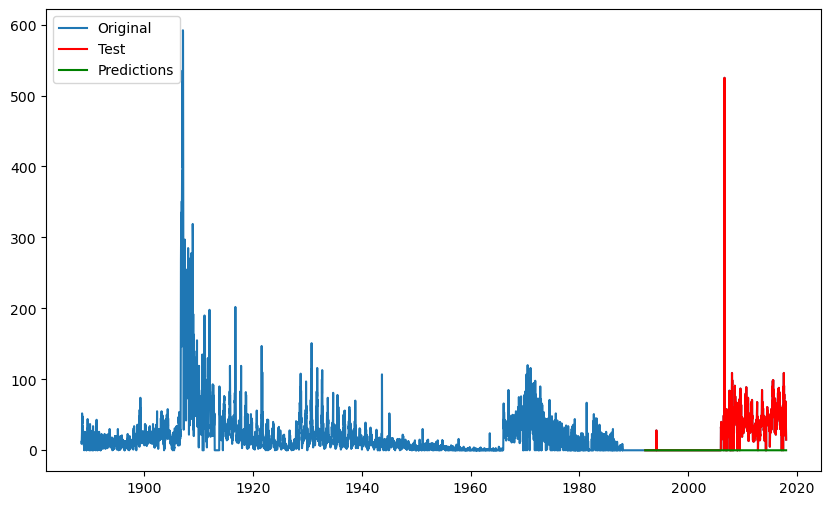

In [79]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_ARIMA = results.forecast(steps = len(test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test, color='red', label='Test')
plt.plot(preds_ARIMA, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


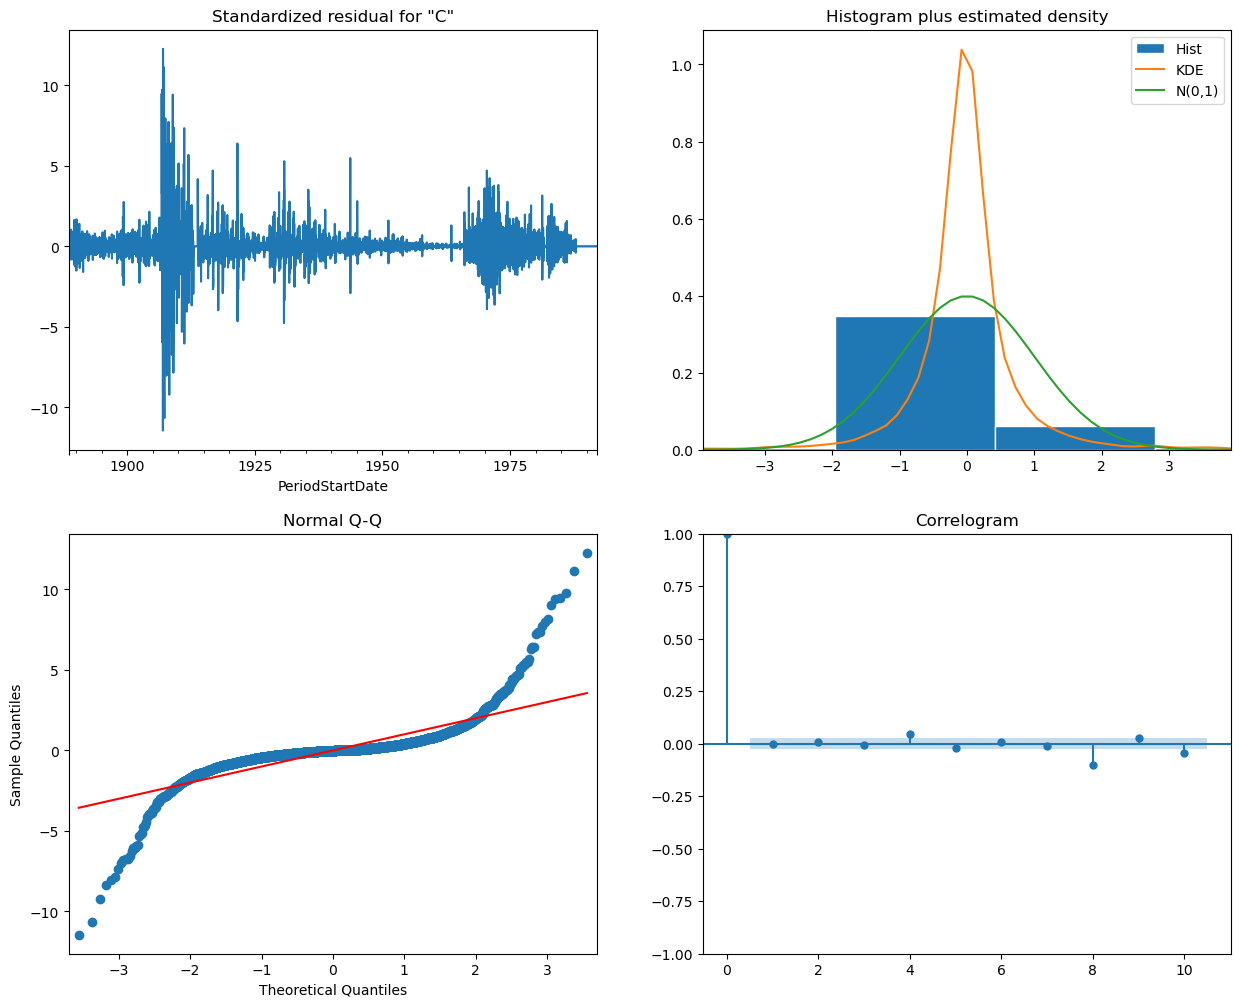

In [80]:
results.plot_diagnostics(figsize = (15,12))
plt.show()

## SARIMA: Seasonal time series data

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35129D+00    |proj g|=  7.95889D-02

At iterate    5    f=  4.27323D+00    |proj g|=  2.61142D-02

At iterate   10    f=  4.21208D+00    |proj g|=  1.91486D-02

At iterate   15    f=  4.21134D+00    |proj g|=  2.00484D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   2.005D-05   4.211D+00
  F =   4.2113358576250333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


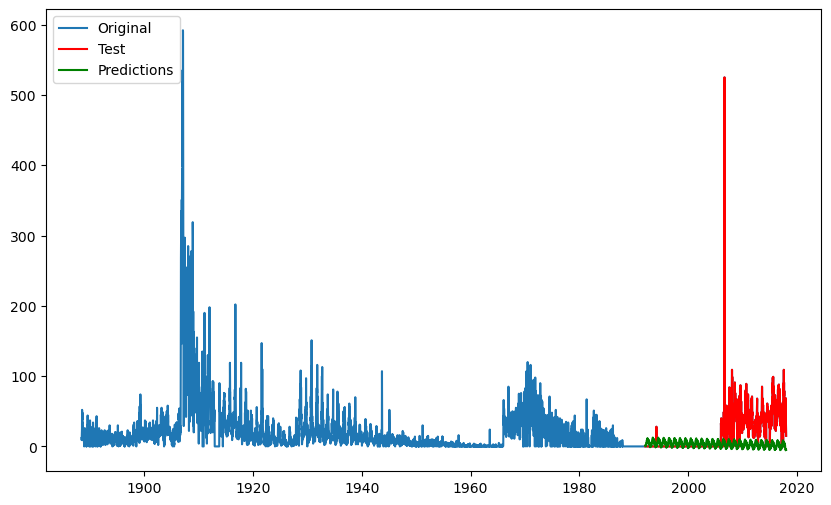

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_SARIMA = results.forecast(steps = len(test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test, color='red', label='Test')
plt.plot(preds_SARIMA, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


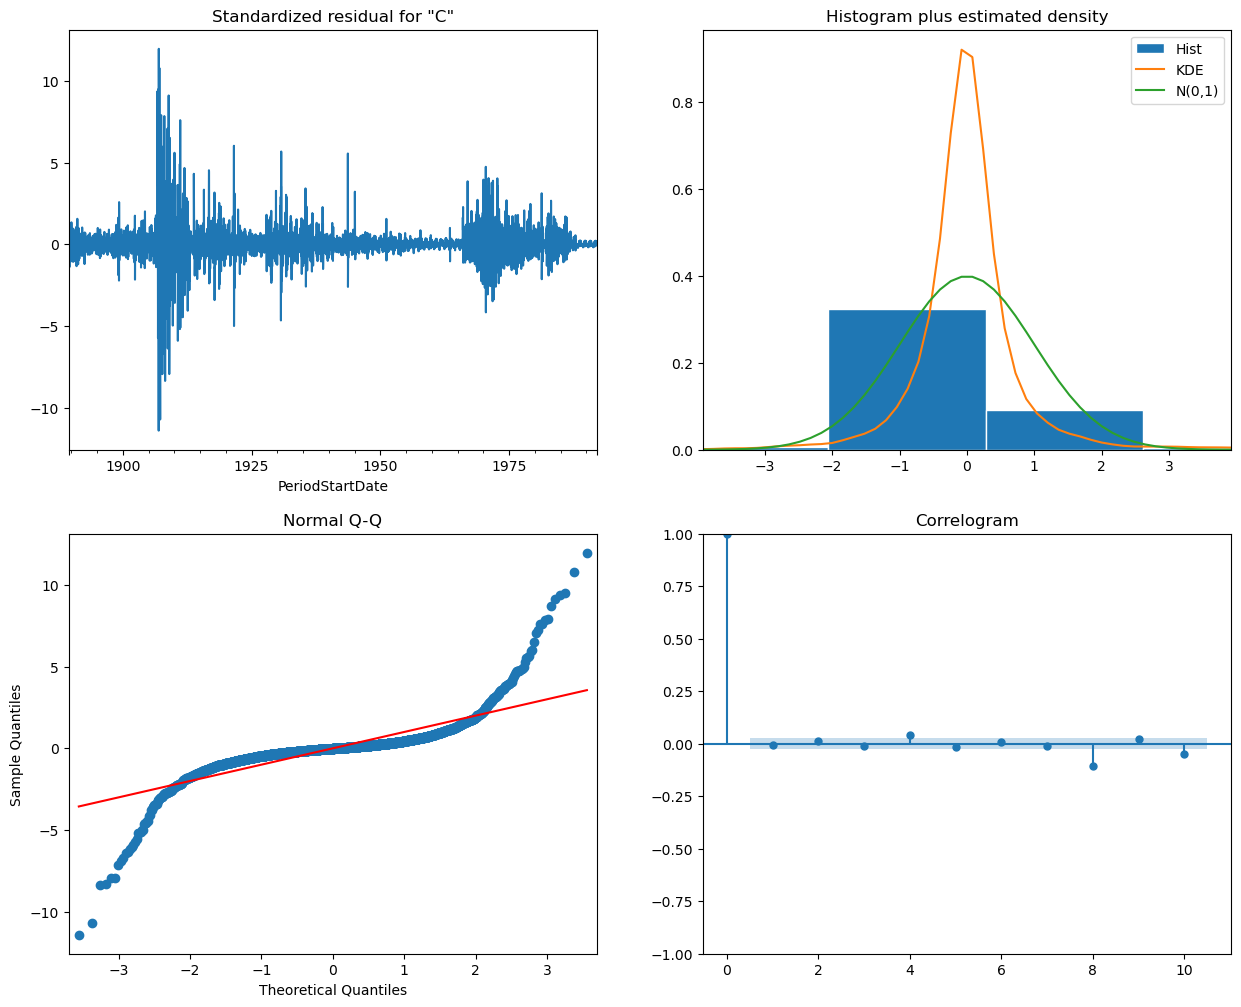

In [82]:
results.plot_diagnostics(figsize = (15,12))
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [84]:
arima_mse = mean_squared_error(test, preds_ARIMA)
arima_mae = mean_absolute_error(test, preds_ARIMA)
sarima_mse = mean_squared_error(test, preds_SARIMA)
sarima_mae = mean_absolute_error(test, preds_SARIMA)

print(f"ARIMA MSE: {arima_mse}, ARIMA MAE: {arima_mae}")
print(f"SARIMA MSE: {sarima_mse}, SARIMA MAE: {sarima_mae}")

ARIMA MSE: 1158.8705621301774, ARIMA MAE: 19.23742603550296
SARIMA MSE: 1080.491621661939, SARIMA MAE: 20.972381451137124


In [85]:
from sklearn.metrics import mean_squared_error

rmse_arima = np.sqrt(arima_mse) # sqrt of MSE
rmse_sarima = np.sqrt(sarima_mse)

target_range = np.max(test['CountValue']) - np.min(test['CountValue']) # Get testing range

percentage_accuracy_arima = (1.0 - (rmse_arima / target_range)) * 100 # Turn into percentage
percentage_accuracy_sarima = (1.0 - (rmse_sarima / target_range)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima:.2f}%')



ARIMA accuracy percentage: 93.52%
SARIMA accuracy percentage: 93.74%


## Data frame from past 20 years

In [86]:
train_20yrs, test_20yrs = split_time_series_data(df, 1997, 2017, 0.8)

### ARIMA

In [87]:
df = df.asfreq('W-SUN')

In [88]:
train_20yrs = train_20yrs.asfreq('W-SUN')

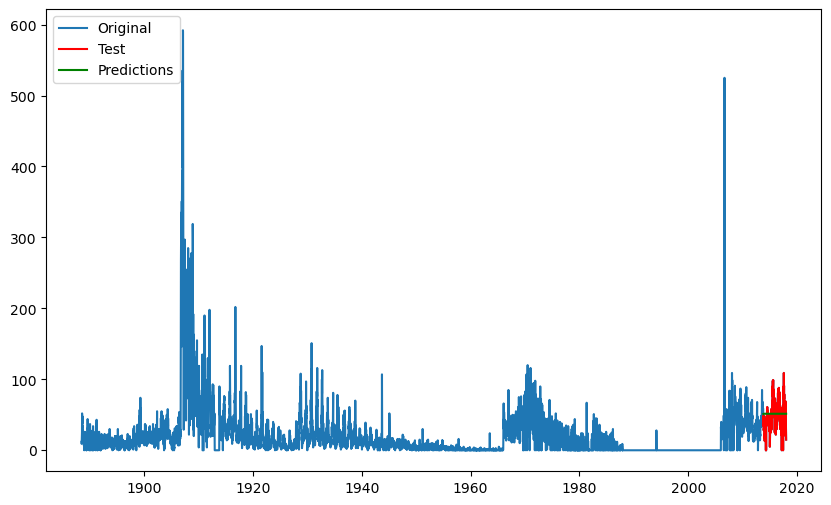

In [89]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_20yrs, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_ARIMA20 = results.forecast(steps = len(test_20yrs))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test_20yrs, color='red', label='Test')
plt.plot(preds_ARIMA20, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


### SARIMA

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38989D+00    |proj g|=  6.24728D-02

At iterate    5    f=  4.35238D+00    |proj g|=  1.57305D-02

At iterate   10    f=  4.26542D+00    |proj g|=  2.04486D-02

At iterate   15    f=  4.24413D+00    |proj g|=  3.00380D-02

At iterate   20    f=  4.24333D+00    |proj g|=  1.30748D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   1.307D-05   4.243D+00
  F =   4.2433335170247952     

CONVERG

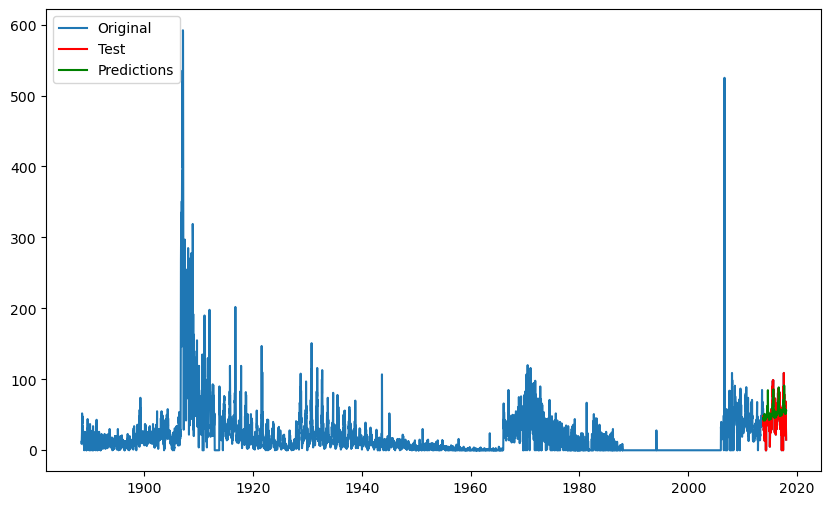

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_20yrs, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_SARIMA20 = results.forecast(steps = len(test_20yrs))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test_20yrs, color='red', label='Test')
plt.plot(preds_SARIMA20, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


In [91]:
arima20_mse = mean_squared_error(test_20yrs, preds_ARIMA20)
arima20_mae = mean_absolute_error(test_20yrs, preds_ARIMA20)
sarima20_mse = mean_squared_error(test_20yrs, preds_SARIMA20)
sarima20_mae = mean_absolute_error(test_20yrs, preds_SARIMA20)

print(f"ARIMA MSE: {arima20_mse}, ARIMA MAE: {arima20_mae}")
print(f"SARIMA MSE: {sarima20_mse}, SARIMA MAE: {sarima20_mae}")

ARIMA MSE: 451.39426525911597, ARIMA MAE: 17.3133225314742
SARIMA MSE: 327.3713546334876, SARIMA MAE: 14.47000715224197


In [92]:

rmse_arima_20 = np.sqrt(arima20_mse) # sqrt of MSE
rmse_sarima_20 = np.sqrt(sarima20_mse)

target_range_20 = np.max(test_20yrs['CountValue']) - np.min(test_20yrs['CountValue']) # Get testing range

percentage_accuracy_arima = (1.0 - (rmse_arima_20 / target_range_20)) * 100 # Turn into percentage
percentage_accuracy_sarima = (1.0 - (rmse_sarima_20 / target_range_20)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima:.2f}%')



ARIMA accuracy percentage: 80.51%
SARIMA accuracy percentage: 83.40%


## Data frame from past 5 years

In [93]:
train_5yrs, test_5yrs = split_time_series_data(df, 2012, 2017, 0.8)

### ARIMA

In [94]:
df = df.asfreq('W-SUN')

In [95]:
train_5yrs = train_5yrs.asfreq('W-SUN')

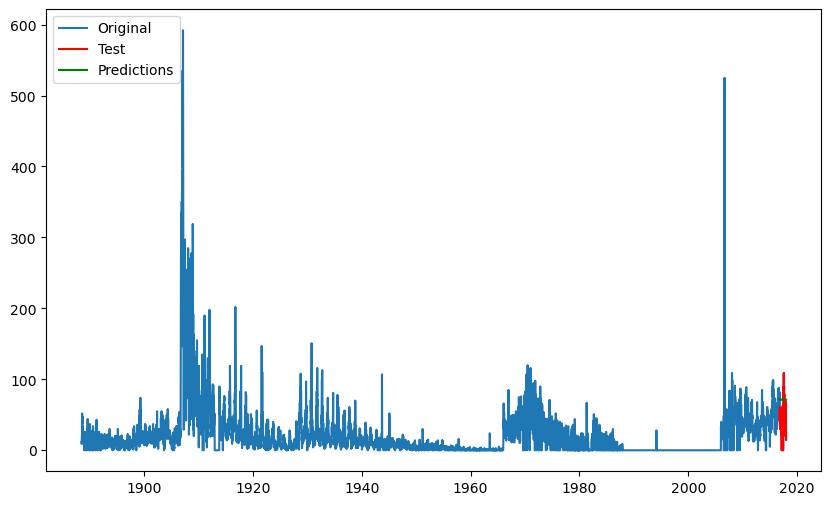

In [96]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_5yrs, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_ARIMA5 = results.forecast(steps = len(test_5yrs))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test_5yrs, color='red', label='Test')
plt.plot(preds_ARIMA5, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


### SARIMA

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11429D+00    |proj g|=  5.75104D-02


 This problem is unconstrained.



At iterate    5    f=  3.08915D+00    |proj g|=  1.43853D-02

At iterate   10    f=  3.07467D+00    |proj g|=  1.32472D-02

At iterate   15    f=  3.07412D+00    |proj g|=  4.35028D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   5.187D-06   3.074D+00
  F =   3.0741173858075692     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


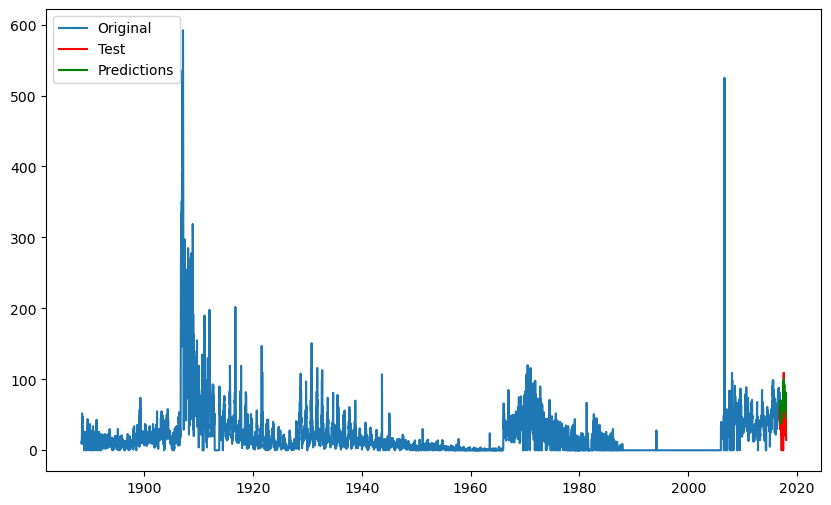

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_5yrs, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_SARIMA5 = results.forecast(steps = len(test_5yrs))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test_5yrs, color='red', label='Test')
plt.plot(preds_SARIMA5, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


In [98]:
arima5_mse = mean_squared_error(test_5yrs, preds_ARIMA5)
arima5_mae = mean_absolute_error(test_5yrs, preds_ARIMA5)
sarima5_mse = mean_squared_error(test_5yrs, preds_SARIMA5)
sarima5_mae = mean_absolute_error(test_5yrs, preds_SARIMA5)

print(f"ARIMA MSE: {arima5_mse}, ARIMA MAE: {arima5_mae}")
print(f"SARIMA MSE: {sarima5_mse}, SARIMA MAE: {sarima5_mae}")

ARIMA MSE: 998.3393257457876, ARIMA MAE: 27.0983052056203
SARIMA MSE: 545.451843134419, SARIMA MAE: 18.93954627565226


In [99]:
rmse_arima_5 = np.sqrt(arima5_mse) # sqrt of MSE
rmse_sarima_5 = np.sqrt(sarima5_mse)

target_range_5 = np.max(test_5yrs['CountValue']) - np.min(test_5yrs['CountValue']) # Get testing range

percentage_accuracy_arima = (1.0 - (rmse_arima_5 / target_range_5)) * 100 # Turn into percentage
percentage_accuracy_sarima = (1.0 - (rmse_sarima_5 / target_range_5)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima:.2f}%')



ARIMA accuracy percentage: 71.01%
SARIMA accuracy percentage: 78.57%


## Data frame from past 2 years

In [100]:
train_2yrs, test_2yrs = split_time_series_data(df, 2015, 2017, 0.8)

### ARIMA

In [101]:
df = df.asfreq('W-SUN')

In [102]:
train_2yrs = train_2yrs.asfreq('W-SUN')

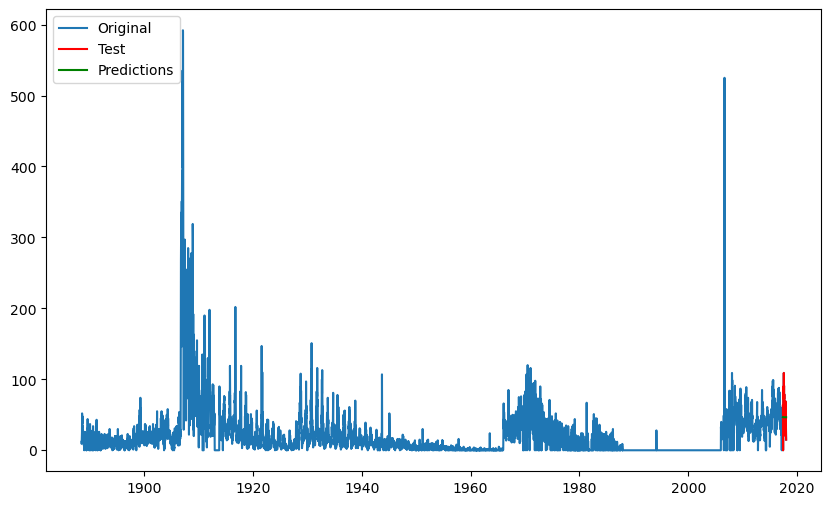

In [103]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_2yrs, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_ARIMA2 = results.forecast(steps = len(test_2yrs))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test_2yrs, color='red', label='Test')
plt.plot(preds_ARIMA2, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


In [104]:
preds_ARIMA2.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 32 entries, 2017-05-21 to 2017-12-24
Freq: W-SUN
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


### SARIMA

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36552D+00    |proj g|=  5.72434D-02


/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.34279D+00    |proj g|=  1.83958D-02

At iterate   10    f=  2.33617D+00    |proj g|=  2.10089D-04

At iterate   15    f=  2.33614D+00    |proj g|=  1.10320D-03

At iterate   20    f=  2.33613D+00    |proj g|=  8.67017D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   5.612D-06   2.336D+00
  F =   2.3361283245670594     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


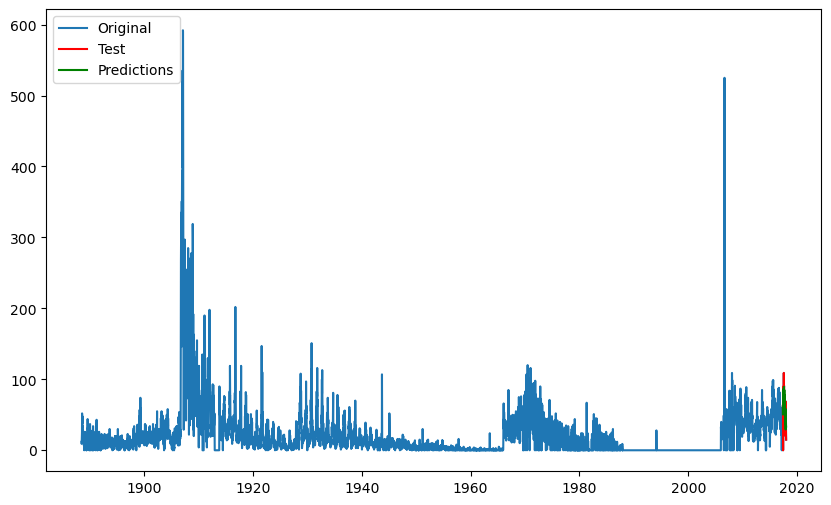

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_2yrs, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_SARIMA2 = results.forecast(steps = len(test_2yrs))
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(test_2yrs, color='red', label='Test')
plt.plot(preds_SARIMA2, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


In [106]:
arima2_mse = mean_squared_error(test_2yrs, preds_ARIMA2)
arima2_mae = mean_absolute_error(test_2yrs, preds_ARIMA2)
sarima2_mse = mean_squared_error(test_2yrs, preds_SARIMA2)
sarima2_mae = mean_absolute_error(test_2yrs, preds_SARIMA2)

print(f"ARIMA MSE: {arima2_mse}, ARIMA MAE: {arima2_mae}")
print(f"SARIMA MSE: {sarima2_mse}, SARIMA MAE: {sarima2_mae}")

ARIMA MSE: 648.186180220579, ARIMA MAE: 20.22357246594484
SARIMA MSE: 275.91374922902116, SARIMA MAE: 11.540114823864151


In [107]:
rmse_arima_2 = np.sqrt(arima2_mse) # sqrt of MSE
rmse_sarima_2 = np.sqrt(sarima2_mse)

target_range_2 = np.max(test_2yrs['CountValue']) - np.min(test_2yrs['CountValue']) # Get testing range

percentage_accuracy_arima = (1.0 - (rmse_arima_2 / target_range_2)) * 100 # Turn into percentage
percentage_accuracy_sarima = (1.0 - (rmse_sarima_2 / target_range_2)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima:.2f}%')



ARIMA accuracy percentage: 76.64%
SARIMA accuracy percentage: 84.76%


In [108]:
preds_SARIMA2.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 32 entries, 2017-05-21 to 2017-12-24
Freq: W-SUN
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


# SARIMAX

In [25]:
url = 'https://raw.githubusercontent.com/torrescschool/foodborne_pathogens/main/Tycho_various_complete.csv'

In [26]:
df_exog = pd.read_csv(url)

In [27]:
df_exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   ConditionSNOMED  23686 non-null  int64 
 2   PathogenName     23686 non-null  object
 3   PathogenTaxonID  23686 non-null  int64 
 4   Fatalities       23686 non-null  int64 
 5   CountryISO       23686 non-null  object
 6   Admin1Name       23686 non-null  object
 7   Admin1ISO        23686 non-null  object
 8   Admin2Name       16914 non-null  object
 9   CityName         16914 non-null  object
 10  PeriodStartDate  23686 non-null  object
 11  PeriodEndDate    23686 non-null  object
 12  CountValue       23686 non-null  int64 
 13  DOI              23686 non-null  object
dtypes: int64(4), object(10)
memory usage: 2.5+ MB


In [28]:
df_exog.columns

Index(['ConditionName', 'ConditionSNOMED', 'PathogenName', 'PathogenTaxonID',
       'Fatalities', 'CountryISO', 'Admin1Name', 'Admin1ISO', 'Admin2Name',
       'CityName', 'PeriodStartDate', 'PeriodEndDate', 'CountValue', 'DOI'],
      dtype='object')

In [29]:
df_exog.drop(labels = ['ConditionSNOMED', 'PathogenTaxonID', 'PathogenName',
       'Fatalities', 'CountryISO', 'Admin1Name', 'Admin1ISO',
        'Admin2Name', 'PeriodEndDate', 'DOI'], axis = 1, inplace = True)

In [30]:
df_exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   CityName         16914 non-null  object
 2   PeriodStartDate  23686 non-null  object
 3   CountValue       23686 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 740.3+ KB


In [31]:
df_exog['CityName'].fillna('Unknown', inplace = True)

In [32]:
def city_to_region(city):
    city = city.strip().lower()

    eastern_cities = ['philadelphia', 'norristown', 'chester', 'west chester', 'pottstown', 'bristol',
                      'phoenixville', 'allentown', 'easton', 'scranton', 'wilkes-barre', 'hazleton',
                      'carbondale', 'nanticoke', 'dunmore', 'pittston', 'dickson city', 'mahanoy city',
                      'shamokin', 'pottsville', 'reading', 'lancaster', 'lebanon', 'york', 'carlisle',
                      'harrisburg', 'chambersburg', 'coatesville']

    central_cities = ['williamsport', 'dubois', 'bradford', 'warren', 'altoona', 'punxsutawney',
                      'sunbury', 'shamokin', 'lewisburg', 'selinsgrove']

    western_cities = ['pittsburgh', 'mckeesport', 'wilkinsburg', 'beaver falls', 'carnegie',
                      'mckees rocks', 'monessen', 'new kensington', 'greensburg', 'jeannette',
                      'connellsville', 'washington', 'sharon', 'farrell', 'aliquippa', 'ambridge',
                      'erie', 'meadville', 'titusville', 'oil city', 'uniontown', 'canonsburg',
                      'donora', 'monongahela']

    if city in eastern_cities:
        return 'Eastern'
    elif city in central_cities:
        return 'Central'
    elif city in western_cities:
        return 'Western'
    else:
        return 'Unknown'


In [33]:
df_exog['Region'] = df_exog['CityName'].apply(city_to_region)
df_exog.drop(labels = 'CityName', axis = 1, inplace = True)

In [34]:
df_exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   PeriodStartDate  23686 non-null  object
 2   CountValue       23686 non-null  int64 
 3   Region           23686 non-null  object
dtypes: int64(1), object(3)
memory usage: 740.3+ KB


In [35]:
import pandas as pd

# Assuming df_exog is already defined and includes 'Region' and 'ConditionName'
df_exog['PeriodStartDate'] = pd.to_datetime(df_exog['PeriodStartDate'])
df_exog.set_index('PeriodStartDate', inplace=True)

# Convert 'Region' into dummies
region_dummies = pd.get_dummies(df_exog['Region'], prefix='Region', drop_first = True)

# Convert 'ConditionName' into dummies
condition_dummies = pd.get_dummies(df_exog['ConditionName'], prefix='Condition', drop_first = True)

# Concatenate 'CountValue', region dummies, and condition dummies
df_exog = pd.concat([df_exog[['CountValue']], region_dummies, condition_dummies], axis=1)

# Resample all as sum, including dummies
df_exog = df_exog.resample('W-SUN').sum()


In [36]:
df_exog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6758 entries, 1888-06-24 to 2017-12-24
Freq: W-SUN
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   CountValue                                                       6758 non-null   int64
 1   Region_Eastern                                                   6758 non-null   uint8
 2   Region_Unknown                                                   6758 non-null   uint8
 3   Region_Western                                                   6758 non-null   uint8
 4   Condition_Amebic dysentery                                       6758 non-null   uint8
 5   Condition_Bacillary dysentery                                    6758 non-null   uint8
 6   Condition_Brucellosis                                            6758 non-null   uint8
 7   Condition_Campylobacteriosis  

In [37]:
train, test = split_time_series_data(df_exog, 1888, 2017, 0.8)

In [38]:
df_exog.columns

Index(['CountValue', 'Region_Eastern', 'Region_Unknown', 'Region_Western',
       'Condition_Amebic dysentery', 'Condition_Bacillary dysentery',
       'Condition_Brucellosis', 'Condition_Campylobacteriosis',
       'Condition_Cryptosporidiosis', 'Condition_Giardiasis',
       'Condition_Infection caused by Escherichia coli',
       'Condition_Infection caused by larvae of Trichinella',
       'Condition_Invasive Group A beta-hemolytic streptococcal disease',
       'Condition_Legionella infection', 'Condition_Salmonella infection',
       'Condition_Shigellosis', 'Condition_Typhoid and paratyphoid fevers',
       'Condition_Typhoid fever', 'Condition_Viral hepatitis, type A'],
      dtype='object')

## SARIMAX on region

In [124]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25029D+00    |proj g|=  1.01428D-01

At iterate    5    f=  4.19535D+00    |proj g|=  9.92615D-02

At iterate   10    f=  4.18343D+00    |proj g|=  7.63539D-02

At iterate   15    f=  4.11804D+00    |proj g|=  7.18530D-02

At iterate   20    f=  4.11325D+00    |proj g|=  3.02280D-03

At iterate   25    f=  4.11306D+00    |proj g|=  2.12171D-03

At iterate   30    f=  4.11301D+00    |proj g|=  1.98836D-02

At iterate   35    f=  4.11290D+00    |proj g|=  2.89693D-03

At iterate   40    f=  4.11285D+00    |proj g|=  2.14360D-03

At iterate   45    f=  4.11285D+00    |proj g|=  1.16407D-03

At iterate   50    f=  4.11282D+00    |proj g|=  1.91796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         CountValue   No. Observations:                 5406
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood              -22233.901
Date:                            Wed, 17 Apr 2024   AIC                          44485.802
Time:                                    21:48:54   BIC                          44544.980
Sample:                                06-24-1888   HQIC                         44506.482
                                     - 01-26-1992                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.012e-06   8803.070   7.97e-10      1.000   -1.73e+04    1.73e+04
Region_Eastern     3.44

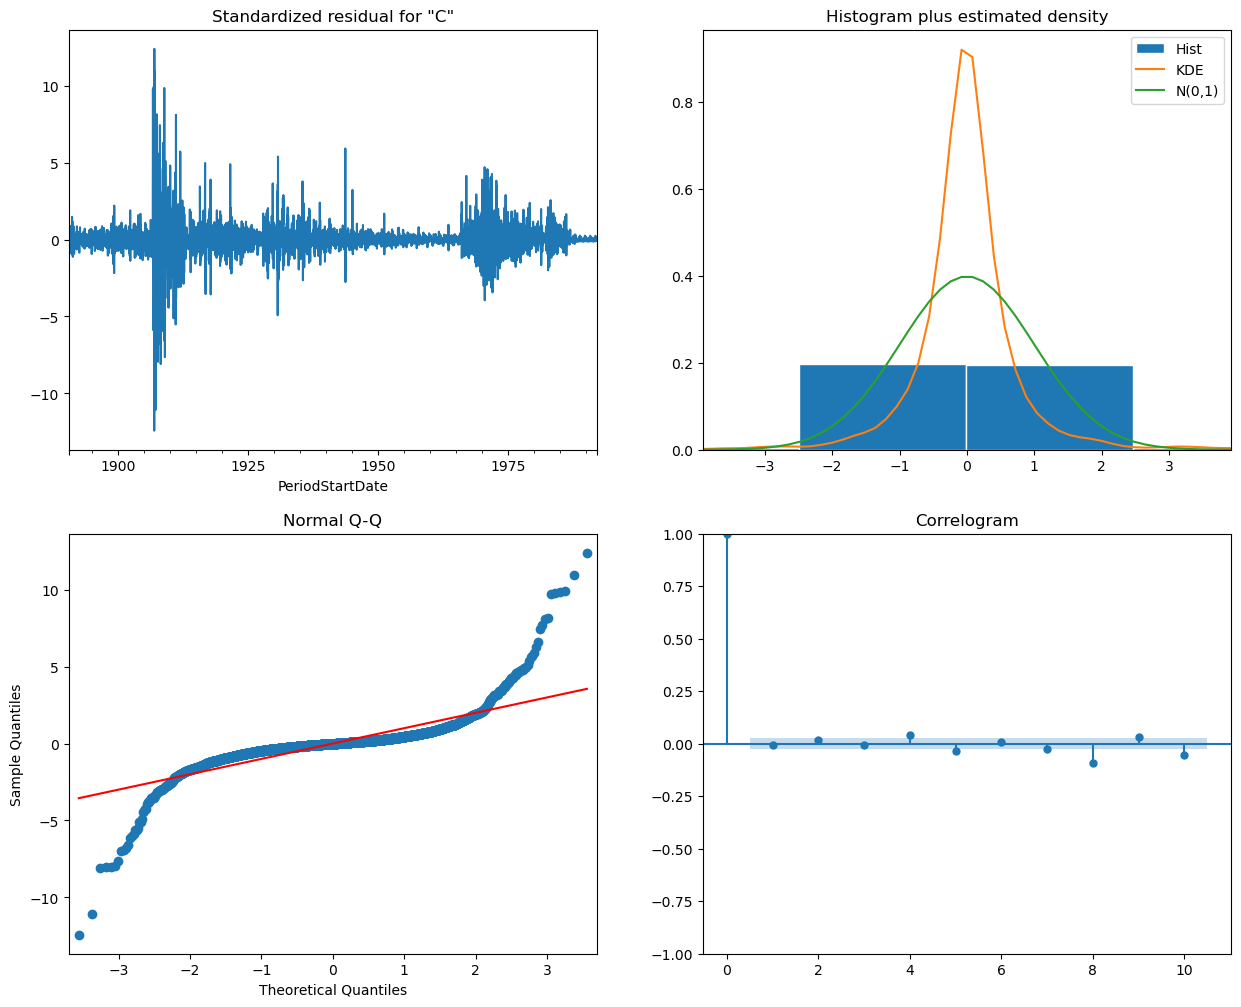

In [125]:
# Define the endogenous and exogenous variables for training
endog_train = train['CountValue']
exog_train = sm.add_constant(train[['Region_Eastern', 'Region_Unknown', 'Region_Western']])

# Define the exogenous variables for testing
exog_test = sm.add_constant(test[['Region_Eastern', 'Region_Unknown', 'Region_Western']])

# Initialize and fit the SARIMAX model on training data
model = sm.tsa.statespace.SARIMAX(endog_train,
                                  exog=exog_train,
                                  order=(1, 1, 1),  # (p, d, q)
                                  seasonal_order=(1, 1, 1, 52),  # (P, D, Q, S)
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()

# Print the results summary
print(results.summary())

# Plot diagnostics to investigate any unusual behavior
results.plot_diagnostics(figsize=(15, 12))
plt.show()


In [126]:
from sklearn.metrics import mean_squared_error

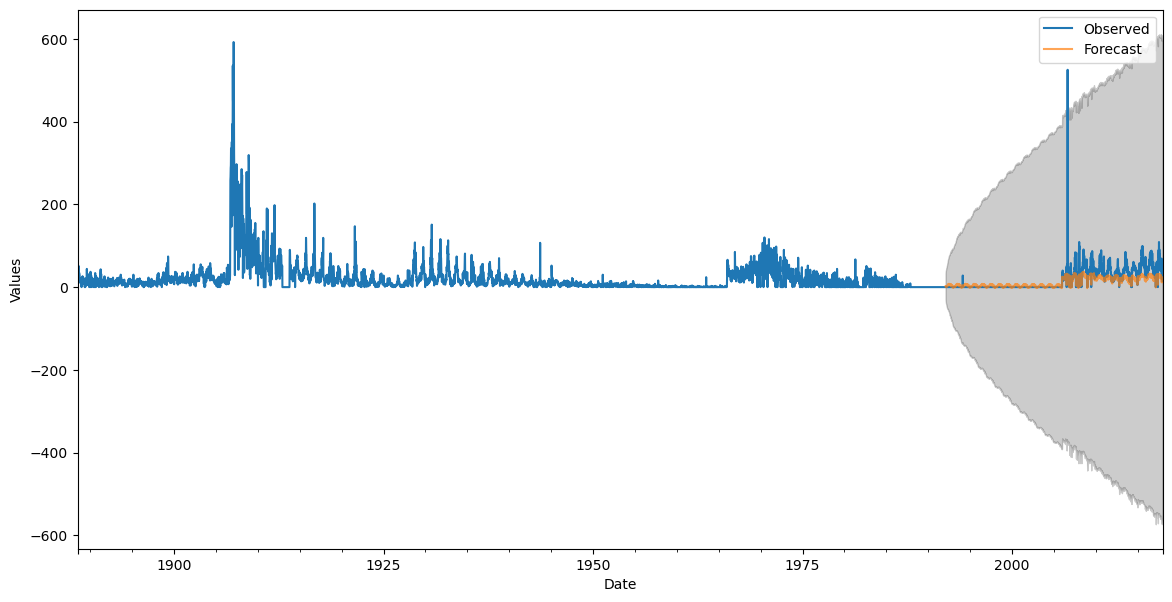

The Mean Squared Error of our forecasts is 475.04


In [127]:
# Making predictions on the test set
pred_start_date = test.index[0]
pred = results.get_prediction(start=pred_start_date, end=test.index[-1], exog=exog_test, dynamic=False)
pred_ci = pred.conf_int()

# Plot the real and forecasted values
ax = df_exog['CountValue'].plot(label='Observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

# Calculate forecast accuracy
forecasted = pred.predicted_mean
actual = test['CountValue']  # actual values
mse = mean_squared_error(actual, forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


In [128]:

rmse_sarimax = np.sqrt(mse)

target_range = np.max(test['CountValue']) - np.min(test['CountValue']) # Get testing range

percentage_accuracy_sarimax = (1.0 - (rmse_sarimax / target_range)) * 100

print(f'SARIMAX accuracy percentage: {percentage_accuracy_sarimax:.2f}%')



SARIMAX accuracy percentage: 95.85%


## SARIMAX on Condition

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23848D+00    |proj g|=  9.81390D-02

At iterate    5    f=  4.17466D+00    |proj g|=  1.40486D-01

At iterate   10    f=  4.16910D+00    |proj g|=  2.70841D-02

At iterate   15    f=  4.14963D+00    |proj g|=  1.33715D-01

At iterate   20    f=  4.10446D+00    |proj g|=  1.31305D-01

At iterate   25    f=  4.09914D+00    |proj g|=  1.08193D-02

At iterate   30    f=  4.09886D+00    |proj g|=  5.10029D-03

At iterate   35    f=  4.09859D+00    |proj g|=  1.29849D-03

At iterate   40    f=  4.09857D+00    |proj g|=  1.84345D-04

At iterate   45    f=  4.09857D+00    |proj g|=  1.42642D-04


/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  4.09854D+00    |proj g|=  7.57846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     66      1     0     0   7.578D-04   4.099D+00
  F =   4.0985448465231391     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                         CountValue   No. Observations:                 5406
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood              -22156.733
Date:                            Wed, 17 Apr 2024   AIC                          44355.4

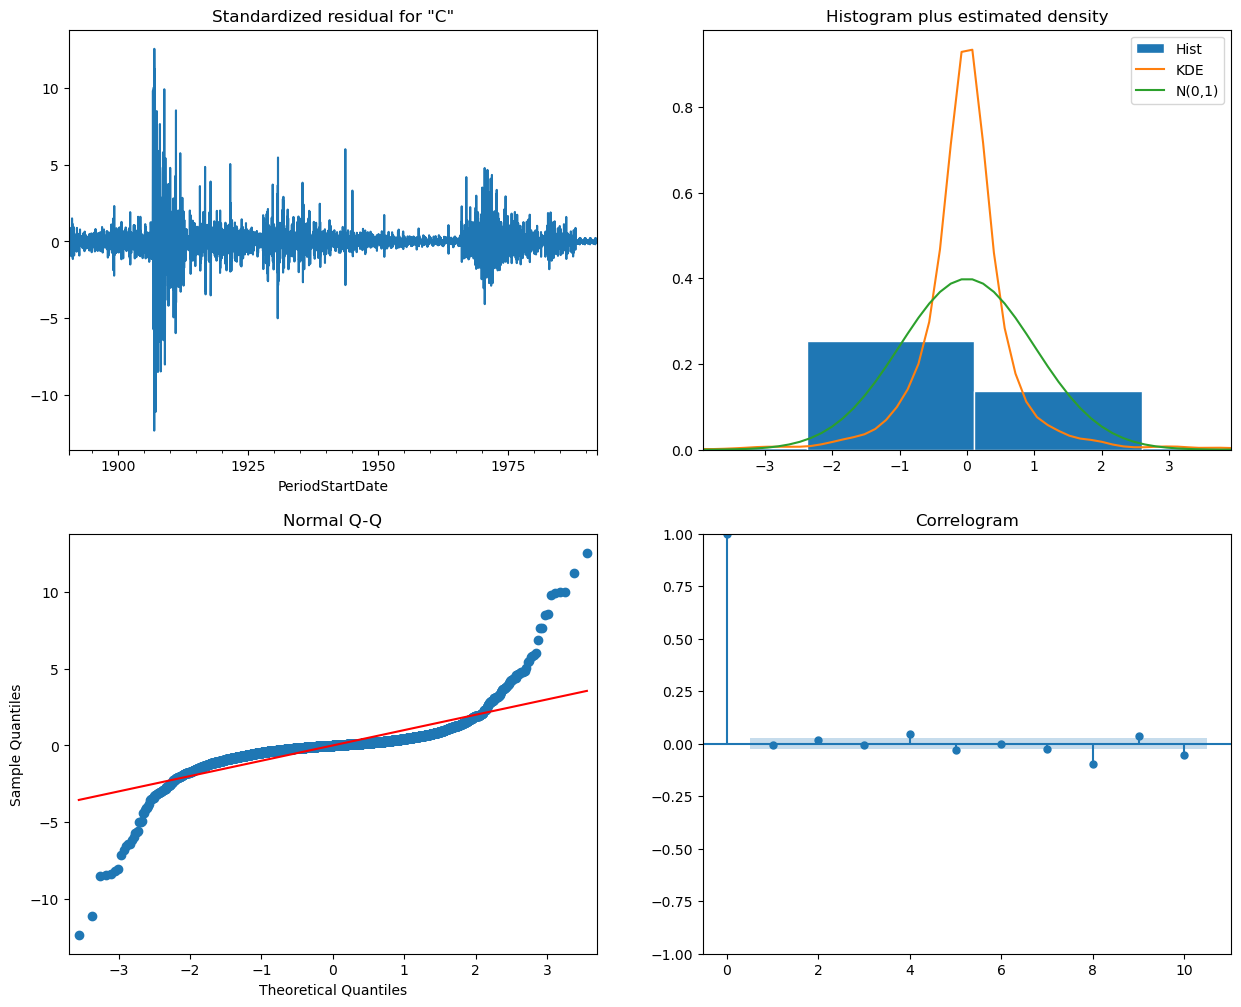

In [130]:
# Define the endogenous and exogenous variables for training
endog_train = train['CountValue']
exog_train = sm.add_constant(train[['Condition_Amebic dysentery', 'Condition_Bacillary dysentery',
       'Condition_Brucellosis', 'Condition_Campylobacteriosis',
       'Condition_Cryptosporidiosis', 'Condition_Giardiasis',
       'Condition_Infection caused by Escherichia coli',
       'Condition_Infection caused by larvae of Trichinella',
       'Condition_Invasive Group A beta-hemolytic streptococcal disease',
       'Condition_Legionella infection', 'Condition_Salmonella infection',
       'Condition_Shigellosis', 'Condition_Typhoid and paratyphoid fevers',
       'Condition_Typhoid fever', 'Condition_Viral hepatitis, type A']])

# Define the exogenous variables for testing
exog_test = sm.add_constant(test[['Condition_Amebic dysentery', 'Condition_Bacillary dysentery',
       'Condition_Brucellosis', 'Condition_Campylobacteriosis',
       'Condition_Cryptosporidiosis', 'Condition_Giardiasis',
       'Condition_Infection caused by Escherichia coli',
       'Condition_Infection caused by larvae of Trichinella',
       'Condition_Invasive Group A beta-hemolytic streptococcal disease',
       'Condition_Legionella infection', 'Condition_Salmonella infection',
       'Condition_Shigellosis', 'Condition_Typhoid and paratyphoid fevers',
       'Condition_Typhoid fever', 'Condition_Viral hepatitis, type A']])

# Initialize and fit the SARIMAX model on training data
model = sm.tsa.statespace.SARIMAX(endog_train,
                                  exog=exog_train,
                                  order=(1, 1, 1),  # (p, d, q)
                                  seasonal_order=(1, 1, 1, 52),  # (P, D, Q, S)
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()

# Print the results summary
print(results.summary())

# Plot diagnostics to investigate any unusual behavior
results.plot_diagnostics(figsize=(15, 12))
plt.show()


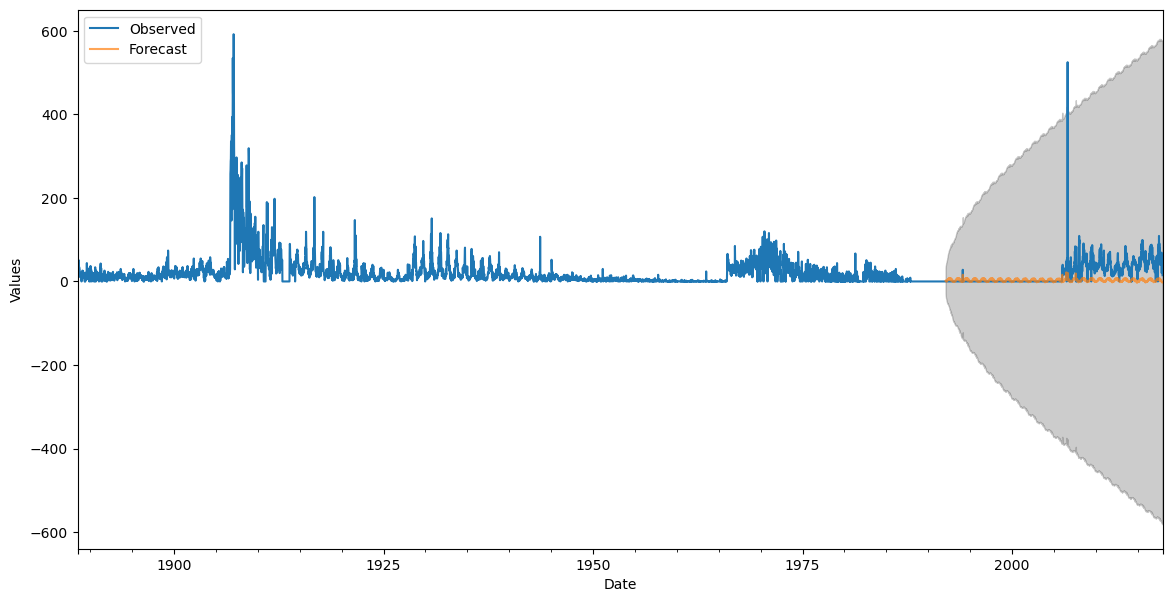

The Mean Squared Error of our forecasts is 1019.94


In [131]:
# Making predictions on the test set
pred_start_date = test.index[0]
pred = results.get_prediction(start=pred_start_date, end=test.index[-1], exog=exog_test, dynamic=False)
pred_ci = pred.conf_int()

# Plot the real and forecasted values
ax = df_exog['CountValue'].plot(label='Observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

# Calculate forecast accuracy
forecasted = pred.predicted_mean
actual = test['CountValue']  # actual values
mse = mean_squared_error(actual, forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


In [132]:

rmse_sarimax = np.sqrt(mse)

target_range = np.max(test['CountValue']) - np.min(test['CountValue']) # Get testing range

percentage_accuracy_sarimax = (1.0 - (rmse_sarimax / target_range)) * 100

print(f'SARIMAX accuracy percentage: {percentage_accuracy_sarimax:.2f}%')



SARIMAX accuracy percentage: 93.92%


# SARIMAX with both region and condition

In [39]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           24     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23651D+00    |proj g|=  9.92463D-02


 This problem is unconstrained.



At iterate    5    f=  4.17672D+00    |proj g|=  9.76498D-02

At iterate   10    f=  4.16758D+00    |proj g|=  2.04101D-02

At iterate   15    f=  4.13036D+00    |proj g|=  3.71721D-01

At iterate   20    f=  4.10368D+00    |proj g|=  7.21661D-02

At iterate   25    f=  4.09906D+00    |proj g|=  7.49831D-03

At iterate   30    f=  4.09802D+00    |proj g|=  8.95544D-03

At iterate   35    f=  4.09790D+00    |proj g|=  5.66436D-04

At iterate   40    f=  4.09784D+00    |proj g|=  1.03847D-02

At iterate   45    f=  4.09775D+00    |proj g|=  2.60755D-04

At iterate   50    f=  4.09775D+00    |proj g|=  7.51753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         CountValue   No. Observations:                 5406
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood              -22152.436
Date:                            Sun, 21 Apr 2024   AIC                          44352.872
Time:                                    16:17:20   BIC                          44510.679
Sample:                                06-24-1888   HQIC                         44408.019
                                     - 01-26-1992                                         
Covariance Type:                              opg                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const   

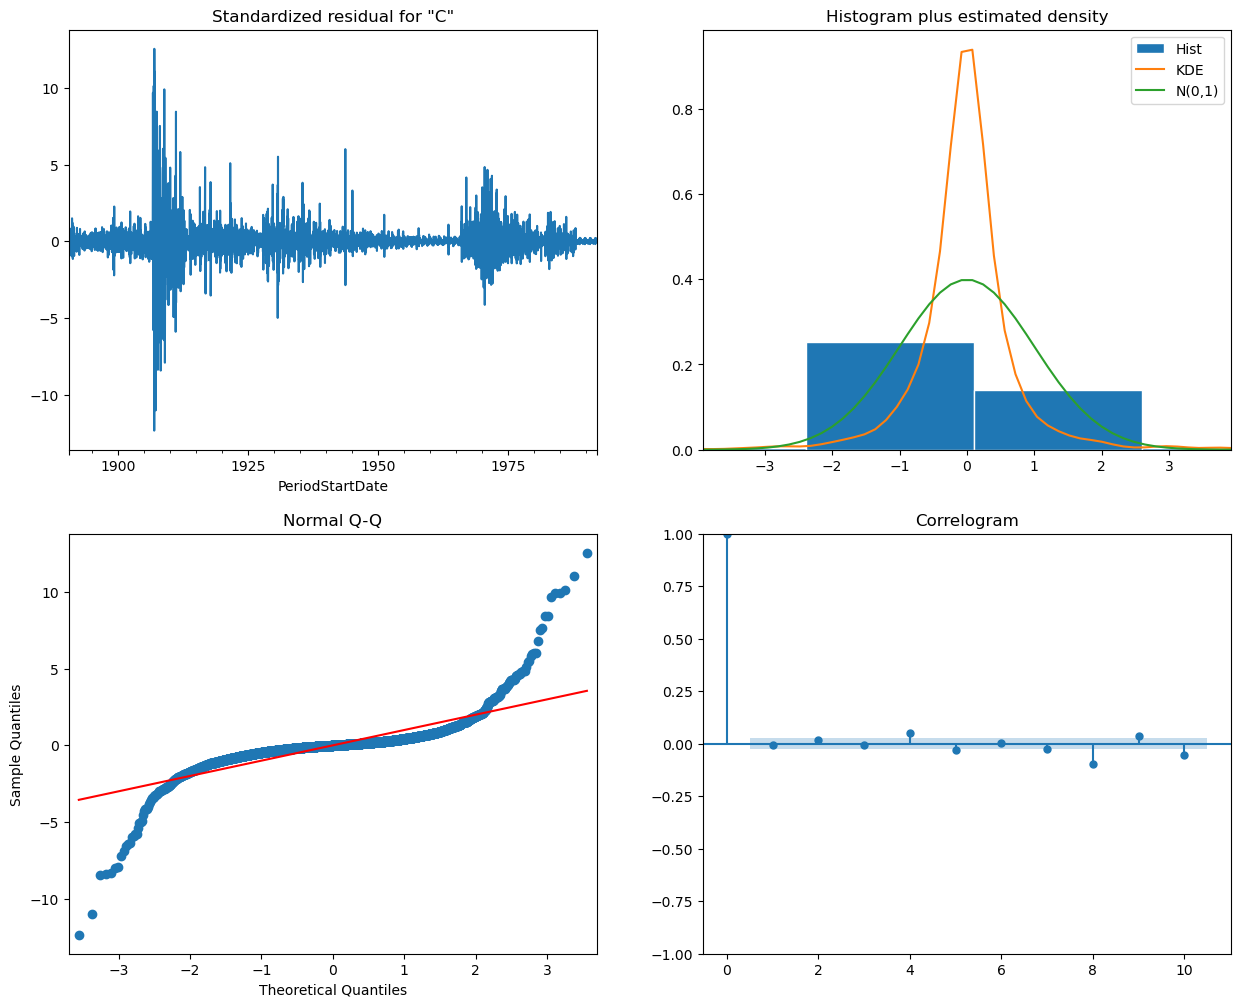

In [40]:
# Define the endogenous and exogenous variables for training
endog_train = train['CountValue']
exog_train = sm.add_constant(train[['Region_Eastern', 'Region_Unknown', 'Region_Western','Condition_Amebic dysentery', 'Condition_Bacillary dysentery',
       'Condition_Brucellosis', 'Condition_Campylobacteriosis',
       'Condition_Cryptosporidiosis', 'Condition_Giardiasis',
       'Condition_Infection caused by Escherichia coli',
       'Condition_Infection caused by larvae of Trichinella',
       'Condition_Invasive Group A beta-hemolytic streptococcal disease',
       'Condition_Legionella infection', 'Condition_Salmonella infection',
       'Condition_Shigellosis', 'Condition_Typhoid and paratyphoid fevers',
       'Condition_Typhoid fever', 'Condition_Viral hepatitis, type A']])

# Define the exogenous variables for testing
exog_test = sm.add_constant(test[['Region_Eastern', 'Region_Unknown', 'Region_Western','Condition_Amebic dysentery', 'Condition_Bacillary dysentery',
       'Condition_Brucellosis', 'Condition_Campylobacteriosis',
       'Condition_Cryptosporidiosis', 'Condition_Giardiasis',
       'Condition_Infection caused by Escherichia coli',
       'Condition_Infection caused by larvae of Trichinella',
       'Condition_Invasive Group A beta-hemolytic streptococcal disease',
       'Condition_Legionella infection', 'Condition_Salmonella infection',
       'Condition_Shigellosis', 'Condition_Typhoid and paratyphoid fevers',
       'Condition_Typhoid fever', 'Condition_Viral hepatitis, type A']])

# Initialize and fit the SARIMAX model on training data
model = sm.tsa.statespace.SARIMAX(endog_train,
                                  exog=exog_train,
                                  order=(1, 1, 1),  # (p, d, q)
                                  seasonal_order=(1, 1, 1, 52),  # (P, D, Q, S)
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()

# Print the results summary
print(results.summary())

# Plot diagnostics to investigate any unusual behavior
results.plot_diagnostics(figsize=(15, 12))
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error

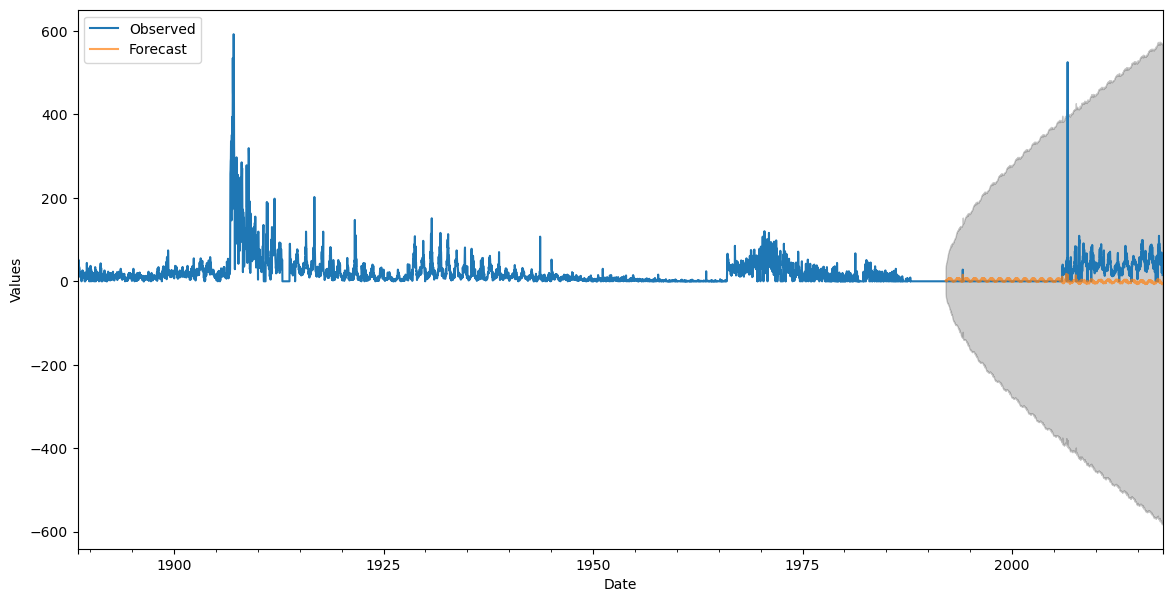

The Mean Squared Error of our forecasts is 1183.83


In [42]:
# Making predictions on the test set
pred_start_date = test.index[0]
pred = results.get_prediction(start=pred_start_date, end=test.index[-1], exog=exog_test, dynamic=False)
pred_ci = pred.conf_int()

# Plot the real and forecasted values
ax = df_exog['CountValue'].plot(label='Observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

# Calculate forecast accuracy
forecasted = pred.predicted_mean
actual = test['CountValue']  # actual values
mse = mean_squared_error(actual, forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


In [43]:

rmse_sarimax = np.sqrt(mse)

target_range = np.max(test['CountValue']) - np.min(test['CountValue']) # Get testing range

percentage_accuracy_sarimax = (1.0 - (rmse_sarimax / target_range)) * 100

print(f'SARIMAX accuracy percentage: {percentage_accuracy_sarimax:.2f}%')



SARIMAX accuracy percentage: 93.45%
